In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("Stores.csv")
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


Remove Store ID columns because the dataframe index is the same

In [ ]:
df = df.drop(columns=['Store ID '], axis = 1)
df

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
...,...,...,...,...
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610


### General info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [ ]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


We can see that there could be outliers in form of either very small or very big stores (10 vs 1560 daily customers)

### Null values

In [ ]:
df.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

We see there are no null values in the whole dataset.

### Distribution of values

Now we check the distributions of values.

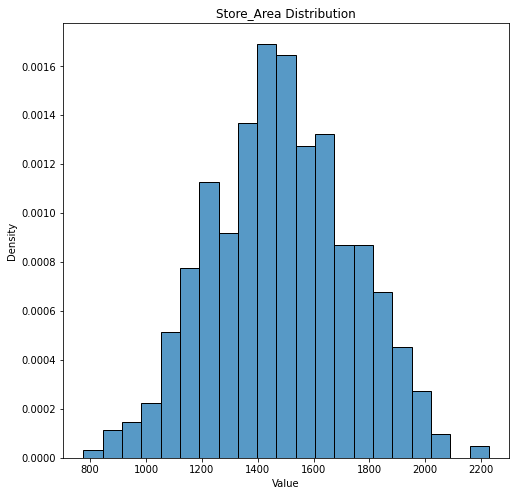

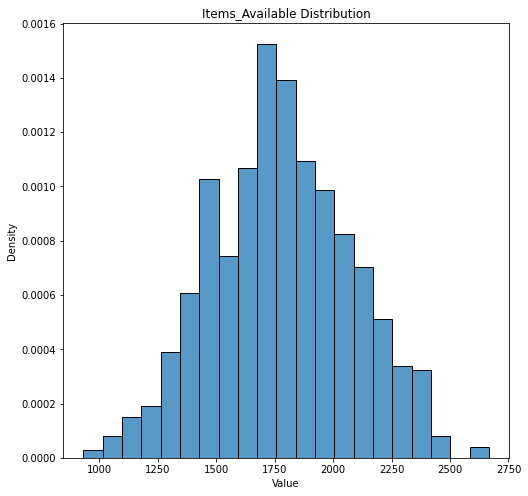

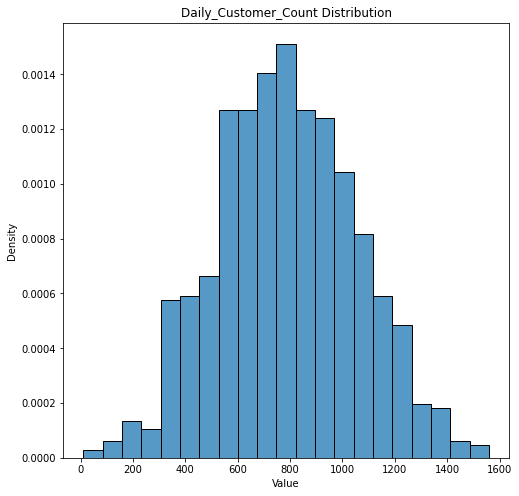

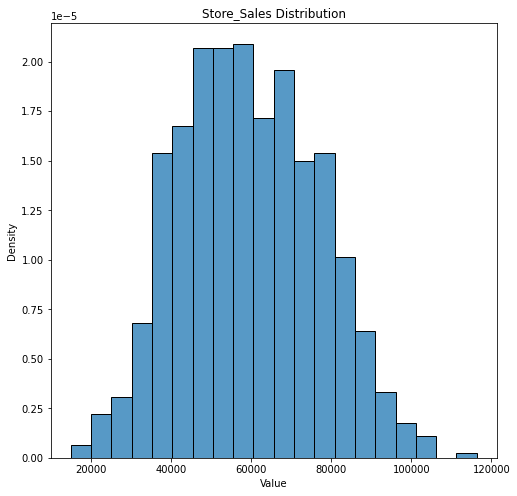

In [ ]:
for feature in df.columns:
    plt.figure(figsize=(8, 8))
    plt.title("{} Distribution".format(feature))
    sns.histplot(df[feature], stat='density')
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()

Normal distributions everywhere, pretty normal.

### Feature correlation

Here we check the relationships between the features.

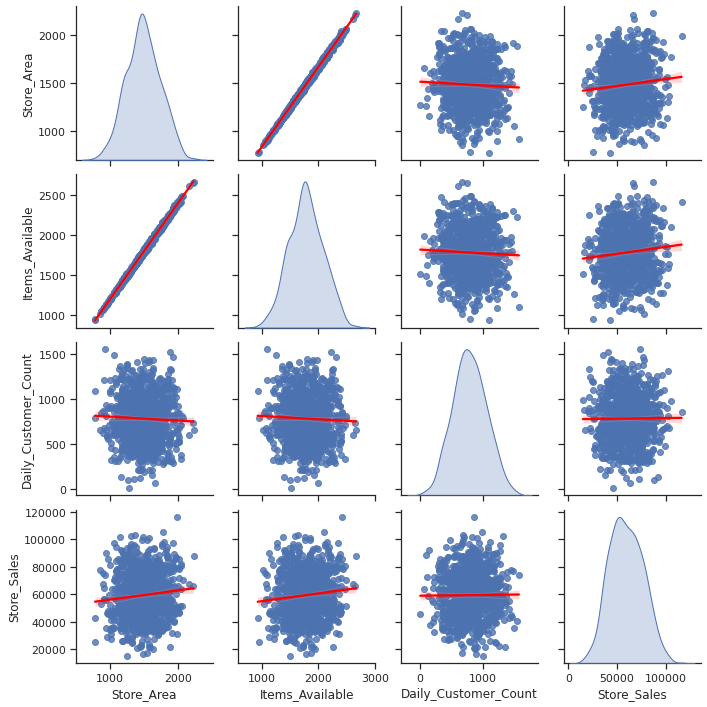

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df , kind ='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.show()

We can see that with the growth of the store area, the number of items sold increases (obviously). There is a slight correlation between store area, products sold and the amount of money earned. The number of customers does not depend on revenue.

### Feature correlation

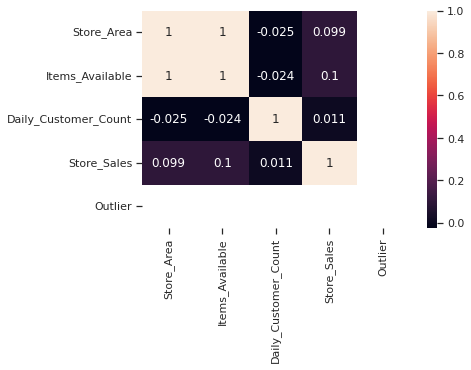

In [ ]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Here we can confirm that Store Area and Items available highly correlate, and Store Sales correlate slighty with Items available (or Store Area), but not so much with Daily Customer Count.

PS: One of the features Items Available/Store Area could be removed since they correlate so highly, but it did strike my mind after the notebook was finished and I didnt want to wait for the model trainings/randomized search again so I left all 3 features there, but all in all it wouldnt change much since the purpose of this wasnt the machine learning.

### Outliers

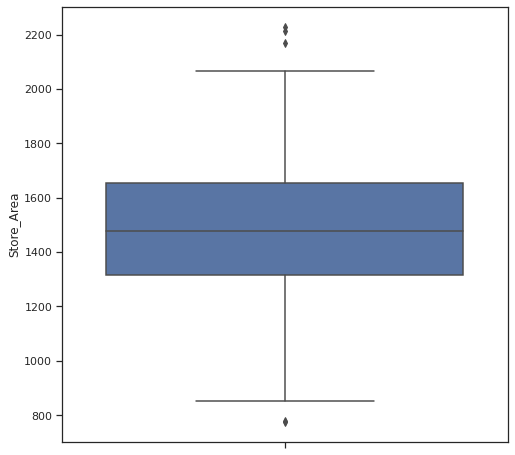

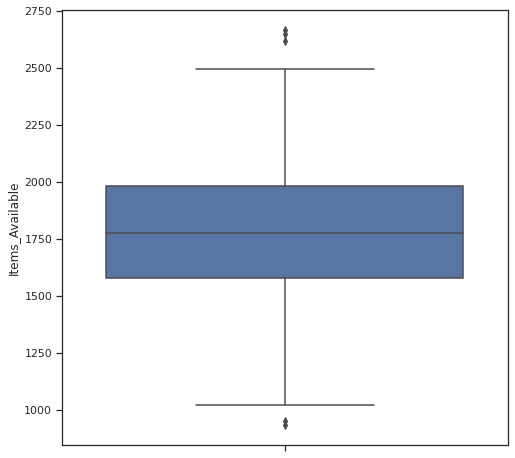

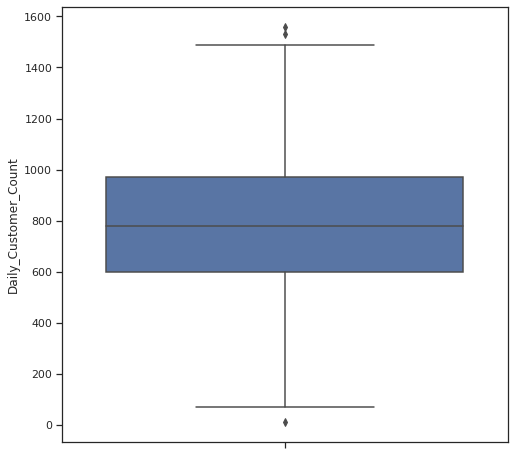

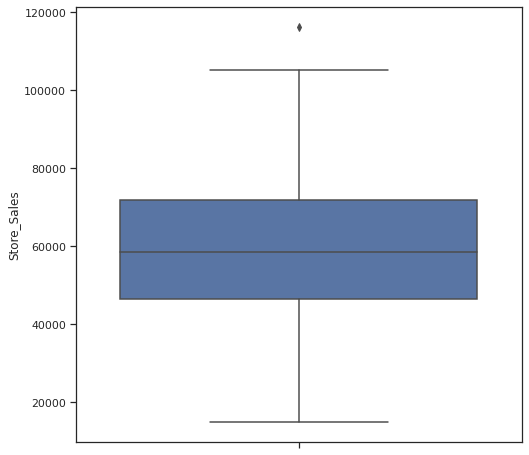

In [ ]:
for feature in df.columns:
    plt.figure(figsize=(8, 8))
    sns.boxplot(y=df[feature])

There are some outliers in the data, we will remove them.

In [ ]:
clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
pred = clf.fit_predict(df) 

In [ ]:
df["Outlier"]=pred
df["Outlier"].value_counts()

 1    873
-1     23
Name: Outlier, dtype: int64

We have 23 outliers in the data, we will remove them.

In [ ]:
df = df[df["Outlier"] == 1]

### Predictive models

Most likely there isnt enough information to train some effective predictors, but why not try anyway.

In [ ]:
y = df["Store_Sales"]
X = df.drop(["Store_Sales", "Outlier"], axis=1)

Prepare data for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:
models = [RandomForestRegressor(random_state=9),
          LinearRegression(),
          ElasticNet(random_state=9),
          KNeighborsRegressor()]

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'RMSE: {mean_squared_error(y_test,y_pred, squared=False)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print('-'*30, '\n')


model: RandomForestRegressor(random_state=9)
RMSE: 17117.25984533072
MAE: 13859.065142857142
------------------------------ 

model: LinearRegression()
RMSE: 16189.611917021091
MAE: 13022.928976352308
------------------------------ 

model: ElasticNet(random_state=9)
RMSE: 16194.705492061259
MAE: 13026.393064556978
------------------------------ 

model: KNeighborsRegressor()
RMSE: 18064.49530954495
MAE: 14541.405714285715
------------------------------ 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+11, tolerance: 2.040e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


We arrive at about 13000 mean absolute error, which is not really useful, but isnt that bad since mean of Store Sales was about 60000, so we have error of about 25% the average. Considering we have only 3 features which do not correlate with the target value, its a pretty good result

I also decided to try and do hyperparameter tuning for the random forest to try and lower the error.

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

Start the Randomized search with the parameters defined above, I decided to not show the process since the output was too long

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,
                         param_distributions  = random_grid,
                         cv = 3,
                         n_iter = 100,
                         random_state=9,
                         verbose=10,
                         n_jobs = 1)
rf_random.fit(X_train, y_train)

Best parameters from the search

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 800}

Here we train and test the base RandomForestRegressor once again

In [ ]:
base_forest = RandomForestRegressor()
base_forest.fit(X_train, y_train)
y_pred = base_forest.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test,y_pred, squared=False)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

RMSE: 17170.34805388306
MAE: 13706.882857142857


And also train RandomForestRegressor with best parameters from the randomized search

In [ ]:
best_forest = rf_random.best_estimator_
best_forest.fit(X_train, y_train)
y_pred = best_forest.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test,y_pred, squared=False)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

RMSE: 16111.953502782133
MAE: 12925.23138207794


We managed to lower the error by about 800$

### Conclusion

There is not much info to draw conclussions from, but from what we saw the Store Sales amount correlates to higher amounts of items available (which also means you will need bigger store), but daily number of customers is not really the main metric you want to improve on.

This can mean that with more items available, the average customer on a shopping trip buys more items on average with increases the sales, which is the same as having more customers buy less items, but since correlation of Sales was higher with Items available, that is the metric we want to improve.

To reach more improvements, more info on the stores is needed.